In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Layer
from tensorflow.keras import layers, regularizers
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam  


2023-11-30 14:15:45.893799: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-30 14:15:45.910620: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 14:15:45.910644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 14:15:45.910655: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 14:15:45.914283: I tensorflow/core/platform/cpu_feature_g

In [2]:
energy_df = pd.read_csv('Einsteiger Genießer.csv', sep=';', decimal=',')
energy_df['Time'] = pd.to_datetime(energy_df['Time'], format='%d.%m.%Y %H:%M')
timestamp_s = energy_df['Time'].map(pd.Timestamp.timestamp)
energy_df

,Electricity.Timestep,Time,Sum [kWh]
0,0,2016-01-01 00:00:00,0.00203968137295407
1,1,2016-01-01 00:01:00,0.00198002204725158
2,2,2016-01-01 00:02:00,0.00198569007313044
3,3,2016-01-01 00:03:00,0.0019885457127341
4,4,2016-01-01 00:04:00,0.00198097807214676
...,...,...,...
527035,527035,2016-12-31 23:55:00,0.00222233953122138
527036,527036,2016-12-31 23:56:00,0.00251202240082651
527037,527037,2016-12-31 23:57:00,0.00281460979360641
527038,527038,2016-12-31 23:58:00,0.00271012354349403


In [3]:
day = 24*60*60
year = (365.2425)*day
hour = 60*60

#Sinus/Cos hinzufügen
energy_df['hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
energy_df['hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))
energy_df['Day sin'] = np.sin(timestamp_s * ( 2* np.pi / day))
energy_df['Day cos'] = np.cos(timestamp_s * (2* np.pi / day))
energy_df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
energy_df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

#Wochentag hinzufügen
energy_df.index=pd.to_datetime(energy_df['Time'],format='%d.%m.%Y %H:%M')
energy_df['wochentag']=energy_df['Time'].dt.dayofweek
energy_df

,Electricity.Timestep,Time,Sum [kWh],hour sin,hour cos,Day sin,Day cos,Year sin,Year cos,wochentag
Time,,,,,,,,,,
2016-01-01 00:00:00,0,2016-01-01 00:00:00,0.00203968137295407,1.990413e-10,1.000000,-1.407890e-12,1.000000,-0.002666,0.999996,4
2016-01-01 00:01:00,1,2016-01-01 00:01:00,0.00198002204725158,1.045285e-01,0.994522,4.363309e-03,0.999990,-0.002654,0.999996,4
2016-01-01 00:02:00,2,2016-01-01 00:02:00,0.00198569007313044,2.079117e-01,0.978148,8.726535e-03,0.999962,-0.002643,0.999997,4
2016-01-01 00:03:00,3,2016-01-01 00:03:00,0.0019885457127341,3.090170e-01,0.951057,1.308960e-02,0.999914,-0.002631,0.999997,4
2016-01-01 00:04:00,4,2016-01-01 00:04:00,0.00198097807214676,4.067366e-01,0.913545,1.745241e-02,0.999848,-0.002619,0.999997,4
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:55:00,527035,2016-12-31 23:55:00,0.00222233953122138,-5.000000e-01,0.866025,-2.181489e-02,0.999762,0.010305,0.999947,5
2016-12-31 23:56:00,527036,2016-12-31 23:56:00,0.00251202240082651,-4.067366e-01,0.913545,-1.745241e-02,0.999848,0.010317,0.999947,5
2016-12-31 23:57:00,527037,2016-12-31 23:57:00,0.00281460979360641,-3.090170e-01,0.951057,-1.308960e-02,0.999914,0.010329,0.999947,5


<function matplotlib.pyplot.show(close=None, block=None)>

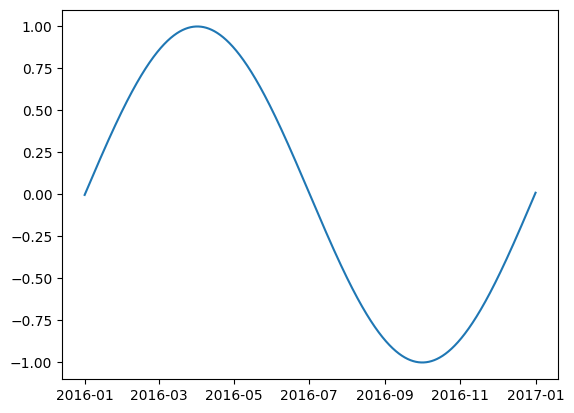

In [4]:
#Plotten zum Test mit allen Spalten, zum Eingrenzen [:1000]
plt.plot(energy_df['Year sin'])
plt.show

In [5]:
# Konvertiere die 'Sum [kWh]' Spalte in numerischen Typ
energy_df['Sum [kWh]'] = pd.to_numeric(energy_df['Sum [kWh]'], errors='coerce')



# Überprüfe die Datentypen
print(energy_df.dtypes)

Electricity.Timestep             int64
Time                    datetime64[ns]
Sum [kWh]                      float64
hour sin                       float64
hour cos                       float64
Day sin                        float64
Day cos                        float64
Year sin                       float64
Year cos                       float64
wochentag                        int32
dtype: object


In [6]:
#Prepare normalisation
max_sum_kWh =energy_df['Sum [kWh]'].max()
print(max_sum_kWh)

0.149508843670478


In [7]:
#Normalisieren
energy_df['Sum [kWh]'] = energy_df['Sum [kWh]'] / max_sum_kWh

#Datentyp umwandeln
energy_df['Sum [kWh]'] = energy_df['Sum [kWh]'].astype(float)

#Durchschnittlicherverbrauch pro WochenTag und hinzufügen  in Dataframe
average_consumption_by_weekday = energy_df.groupby('wochentag')['Sum [kWh]'].mean()
energy_df['Average Consumption Weekday'] = energy_df['wochentag'].map(average_consumption_by_weekday)

#Durchschnittlicherverbrauch pro Stunde
average_consumption_by_hour = energy_df.groupby('hour sin')['Sum [kWh]'].mean()
energy_df['Average Consumption hour sin'] = energy_df['hour sin'].map(average_consumption_by_hour)


#Spalten löschen
columns_to_drop= ['Time','wochentag','Electricity.Timestep'] 
energy_df=energy_df.drop(columns_to_drop, axis=1)

energy_df

,Sum [kWh],hour sin,hour cos,Day sin,Day cos,Year sin,Year cos,Average Consumption Weekday,Average Consumption hour sin
Time,,,,,,,,,
2016-01-01 00:00:00,0.013643,1.990413e-10,1.000000,-1.407890e-12,1.000000,-0.002666,0.999996,0.033676,0.013643
2016-01-01 00:01:00,0.013244,1.045285e-01,0.994522,4.363309e-03,0.999990,-0.002654,0.999996,0.033676,0.013244
2016-01-01 00:02:00,0.013281,2.079117e-01,0.978148,8.726535e-03,0.999962,-0.002643,0.999997,0.033676,0.013281
2016-01-01 00:03:00,0.013301,3.090170e-01,0.951057,1.308960e-02,0.999914,-0.002631,0.999997,0.033676,0.013301
2016-01-01 00:04:00,0.013250,4.067366e-01,0.913545,1.745241e-02,0.999848,-0.002619,0.999997,0.033676,0.013250
...,...,...,...,...,...,...,...,...,...
2016-12-31 23:55:00,0.014864,-5.000000e-01,0.866025,-2.181489e-02,0.999762,0.010305,0.999947,0.044425,0.014864
2016-12-31 23:56:00,0.016802,-4.067366e-01,0.913545,-1.745241e-02,0.999848,0.010317,0.999947,0.044425,0.016802
2016-12-31 23:57:00,0.018826,-3.090170e-01,0.951057,-1.308960e-02,0.999914,0.010329,0.999947,0.044425,0.018826


In [8]:
# Aufteilung in Features und Labels
X = energy_df[['Sum [kWh]','Day sin', 'Day cos', 'Year sin', 'Year cos', 'Average Consumption hour sin','hour cos','hour sin','Average Consumption Weekday']]                            #Wenn man Stromverbrauch rauslässt trotzdem gute Ergebnisse
y = energy_df['Sum [kWh]']

# Normierung der Daten (z.B. Min-Max-Skalierung)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Sequenzbildung
sequence_length = 20                                                                                                             #Beispiel: Sequenzen von 10 aufeinander folgenden Zeitschritten
X_sequences, y_sequences = [], []

for i in range(len(X_scaled) - sequence_length):    
   X_sequences.append(X_scaled[i:i+sequence_length, :])
   y_sequences.append(y.iloc[i+sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)



# Festlegung der Größe für Training und Test
train_size = int(0.95 * len(X_sequences))
test_size = 2
val_size = len(X_sequences) - train_size - test_size

# Aufteilung in Trainings-, Validierungs- und Testdatensätze
X_train = X_sequences[:train_size]
y_train = y_sequences[:train_size]

X_val = X_sequences[train_size:train_size+val_size]
y_val = y_sequences[train_size:train_size+val_size]

X_test = X_sequences[train_size+val_size:train_size+val_size+test_size]
y_test = y_sequences[train_size+val_size:train_size+val_size+test_size]


# Überprüfen der Shape der Datensätze
print("Trainingsdaten:", X_train.shape, y_train.shape)
print("Validierungsdaten:", X_val.shape, y_val.shape)
print("Testdaten:", X_test.shape, y_test.shape)

Trainingsdaten: (500669, 20, 9) (500669,)
Validierungsdaten: (26349, 20, 9) (26349,)
Testdaten: (2, 20, 9) (2,)


In [9]:
class Patch(Layer):
    def __init__(self, patch_size, stride=1, **kwargs):
        super(Patch, self).__init__(**kwargs)
        self.patch_size = patch_size
        self.stride = stride

    def call(self, inputs):
        # Calculate the number of patches using static shape
        input_shape_static = inputs.shape
        num_patches = (input_shape_static[1] - self.patch_size) // self.stride + 1

        # Initialize TensorArray to collect patches
        patches_ta = tf.TensorArray(dtype=tf.float32, size=num_patches, dynamic_size=False, infer_shape=True)

        # Use tf.while_loop for creating overlapping patches
        i = 0
        while_condition = lambda i, _: i < num_patches

        def body(i, patches_ta):
            start = i * self.stride
            end = start + self.patch_size
            patch = inputs[:, start:end, :]
            patches_ta = patches_ta.write(i, patch)
            return i + 1, patches_ta

        _, patches_ta = tf.while_loop(while_condition, body, [i, patches_ta])

        # Stack the patches
        patches = patches_ta.stack()
        patches = tf.transpose(patches, [1, 0, 2, 3])

        # Set the shape explicitly
        input_shape = tf.keras.backend.int_shape(inputs)
        num_patches = (input_shape[1] - self.patch_size) // self.stride + 1
        patches.set_shape([input_shape[0], num_patches, self.patch_size, input_shape[2]])

        return patches

In [10]:
class PatchMixer(Layer):
    
    def __init__(self, time_steps, num_features, patch_size, stride, filters, **kwargs):
        super(PatchMixer, self).__init__(**kwargs)
        self.time_steps = time_steps
        self.num_features = num_features
        self.patch_size = patch_size
        self.stride = stride
        self.filters = filters
        # Layers
        self.dw_conv = layers.DepthwiseConv2D(kernel_size=(1, patch_size), padding='valid', depth_multiplier=1)
        self.activation_dw = layers.Activation("gelu")
        self.batch_norm_dw = layers.BatchNormalization()
        self.pw_conv = layers.Conv2D(filters=filters, kernel_size=1, strides=1, padding="same")
        self.activation_pw = layers.Activation("gelu")
        self.batch_norm_pw = layers.BatchNormalization()

    def call(self, inputs):
        dw = self.dw_conv(inputs)
        dw = self.activation_dw(dw)
        dw = self.batch_norm_dw(dw)
        residual = tf.add(dw, inputs)
        pw = self.pw_conv(residual)
        pw = self.activation_pw(pw)
        pw = self.batch_norm_pw(pw)
        return pw

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], input_shape[2], self.filters)


In [11]:

def build_model():
    time_steps = 20
    num_features = 9
    patch_size = 10
    stride = 5                                                                  # Hälfte der Patch Size

    inp = layers.Input((time_steps, num_features))
    patch = Patch(patch_size, stride=stride)(inp)
    patch_residual = layers.Flatten()(patch)
    mixer = PatchMixer(time_steps, num_features, patch_size, stride, 64)(patch)
    flat = layers.Flatten()(mixer)
    dense = layers.Dense(patch_residual.shape[-1])(flat)
    dense = layers.Activation("gelu")(dense)
    res = tf.add(patch_residual, dense)
    o = layers.Dense(128)(res)
    out = layers.Dense(1, activation="linear")(o)
    m = Model(inputs=inp, outputs=out)
    return m


#Wo model.summary einfügen?

if __name__ == "__main__":
    model_gen_pm = build_model()
    learning_rate = 0.0001
    optimizer = Adam(learning_rate=learning_rate)
    model_gen_pm.compile(optimizer=optimizer, loss="MSE", metrics=["MAE"])
    model_gen_pm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
    

2023-11-30 14:15:50.714254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 14:15:50.716736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 14:15:50.716756: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 14:15:50.717819: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 14:15:50.717835: I tensorflow/compile

Epoch 1/50


: 